In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [4]:
# load the data

X_train = np.loadtxt("data/data_Train.txt")
y_train = np.loadtxt("labels/labels_Train.txt")

X_val = np.loadtxt("data/data_Validation.txt")
y_val = np.loadtxt("labels/labels_Validation.txt")

X_test = np.loadtxt("data/data_Test.txt")
y_test = np.loadtxt("labels/labels_Test.txt")

In [5]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(2979456, 44)
(708480, 44)
(712320, 44)


In [6]:
X_train = X_train.reshape((-1, 128, 44))
X_val = X_val.reshape((-1, 128, 44))
X_test = X_test.reshape((-1, 128, 44))

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(23277, 128, 44)
(5535, 128, 44)
(5565, 128, 44)


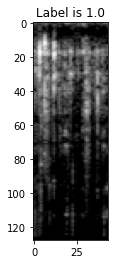

In [9]:
index = 16000

plt.imshow(X_train[index], cmap ="gray")
plt.title(f"Label is {y_train[index]}")
plt.show()

In [ ]:
# resizing images

#data_padded = [data[i] for i in range(0, data.shape[0])]

#n_samples = data.shape[0]
#height = data.shape[1]
#width = data.shape[2]


#for i in range(0, n_samples):
#    for j in range(width, height):
#        data_padded[i] = np.append(data_padded[i], [[0] for k in range(0, height)], 1)
    
#data_padded = np.array(data_padded)
#data_padded.shape
#data = data_padded

In [10]:
X_train = X_train.reshape((-1, 128, 44, 1))
X_val = X_val.reshape((-1, 128, 44, 1))
X_test = X_test.reshape((-1, 128, 44, 1))

In [ ]:
# train test split
#from sklearn.model_selection import train_test_split

#X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True)

(array([11032.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 12245.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

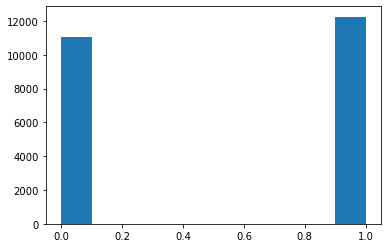

In [11]:
from matplotlib import pyplot as plt

plt.hist(y_train)

In [12]:
from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(12, (3, 3),
                        strides=1,
                        activation="relu",
                        input_shape=(128, 44, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation="sigmoid"))

#model = models.Sequential()
#model.add(layers.Flatten(input_shape=(128, 128)))
#model.add(layers.Dense(128, activation="relu"))
#model.add(layers.Dense(1, activation ="sigmoid"))


model.summary()

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics="accuracy"
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 42, 12)       120       
_________________________________________________________________
flatten (Flatten)            (None, 63504)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 63505     
Total params: 63,625
Trainable params: 63,625
Non-trainable params: 0
_________________________________________________________________


In [13]:
# normalize

X_train = X_train.astype("float32")/255.0
X_test = X_train.astype("float32")/255.0

In [ ]:
#from tensorflow.keras.utils import to_categorical

#y_train = to_categorical(y_train)
#y_test = to_categorical(y_test)

In [14]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=256,
    validation_data=(X_val, y_val),
)

Epoch 1/50
91/91 [==============================] - 6s 66ms/step - loss: 0.5759 - accuracy: 0.7488 - val_loss: 23.9313 - val_accuracy: 0.7008
Epoch 2/50
91/91 [==============================] - 6s 65ms/step - loss: 0.2547 - accuracy: 0.9283 - val_loss: 55.9411 - val_accuracy: 0.5754
Epoch 3/50
91/91 [==============================] - 6s 65ms/step - loss: 0.1738 - accuracy: 0.9505 - val_loss: 11.8468 - val_accuracy: 0.9407
Epoch 4/50
91/91 [==============================] - 6s 64ms/step - loss: 0.1295 - accuracy: 0.9609 - val_loss: 66.8972 - val_accuracy: 0.7769
Epoch 5/50
91/91 [==============================] - 6s 63ms/step - loss: 0.1110 - accuracy: 0.9645 - val_loss: 28.5812 - val_accuracy: 0.8808
Epoch 6/50
91/91 [==============================] - 6s 62ms/step - loss: 0.0876 - accuracy: 0.9726 - val_loss: 12.0156 - val_accuracy: 0.9476
Epoch 7/50
91/91 [==============================] - 6s 63ms/step - loss: 0.0767 - accuracy: 0.9755 - val_loss: 26.9715 - val_accuracy: 0.8985
Epoch 

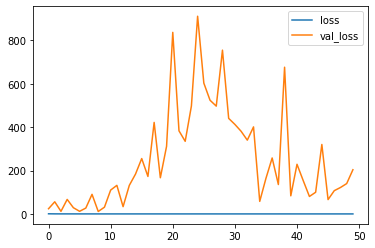

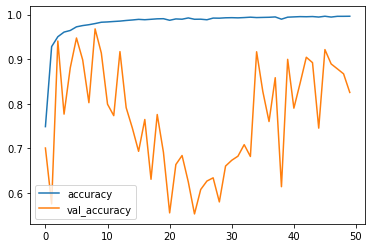

In [15]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()
plt.close()